In [1]:
#!pip install beautifulsoup4
#!pip install WordCloud

In [2]:
## Importing Libraries
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 
import seaborn as sns

#### Extracting reviews from Amazon for Oneplus Phone

In [3]:
link = 'https://www.amazon.in/Test-Exclusive-545/product-reviews/B077Q42GDF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [4]:
page = requests.get(link)

In [5]:
page

<Response [200]>

In [6]:
soup = bs(page.content, 'html.parser')

In [7]:
text = soup.find_all('span', {'data-hook': 'review-body'})

In [8]:
text

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>From being a flagship killer to a flagship. What a journey this has been for OnePlus community. I had OnePlus 5 earlier and its still a fabulous phone. As there are so many phones coming up decided to finally upgrade on my OnePlus 5. So without further ado let me share my experience.<br/><br/>I have read many reviews about the screen and red/green tints on amazon and oneplus forums as well. All those reviews scared me a bit as there are about 80% of such negative reviews regarding the display.<br/>However the unit I received do not have any of these issues and after using this device I might know why such tints or abnormal colors are being displayed.<br/><br/>If you are seeing any tint on the screen, remove the pre installed tampered glass type plastic from the display and witness the beautiful display :) Majority of the users are seeing colors being reflected from the sides of this tampered glas

In [9]:
len(text)

10

In [10]:
rev_text = []
for i in range(0, len(text)):
    rev_text.append(text[i].get_text())

rev_text

['\nFrom being a flagship killer to a flagship. What a journey this has been for OnePlus community. I had OnePlus 5 earlier and its still a fabulous phone. As there are so many phones coming up decided to finally upgrade on my OnePlus 5. So without further ado let me share my experience.I have read many reviews about the screen and red/green tints on amazon and oneplus forums as well. All those reviews scared me a bit as there are about 80% of such negative reviews regarding the display.However the unit I received do not have any of these issues and after using this device I might know why such tints or abnormal colors are being displayed.If you are seeing any tint on the screen, remove the pre installed tampered glass type plastic from the display and witness the beautiful display :) Majority of the users are seeing colors being reflected from the sides of this tampered glass and they assume that its a screen issue :)To begin with pros of this device :1. Software is flawless. OxygenOS

In [11]:
rev_text[:] = [text.lstrip('\n') for text in rev_text]
rev_text

['From being a flagship killer to a flagship. What a journey this has been for OnePlus community. I had OnePlus 5 earlier and its still a fabulous phone. As there are so many phones coming up decided to finally upgrade on my OnePlus 5. So without further ado let me share my experience.I have read many reviews about the screen and red/green tints on amazon and oneplus forums as well. All those reviews scared me a bit as there are about 80% of such negative reviews regarding the display.However the unit I received do not have any of these issues and after using this device I might know why such tints or abnormal colors are being displayed.If you are seeing any tint on the screen, remove the pre installed tampered glass type plastic from the display and witness the beautiful display :) Majority of the users are seeing colors being reflected from the sides of this tampered glass and they assume that its a screen issue :)To begin with pros of this device :1. Software is flawless. OxygenOS i

In [12]:
rev_text[:] = [text.rstrip('\n') for text in rev_text]
rev_text

['From being a flagship killer to a flagship. What a journey this has been for OnePlus community. I had OnePlus 5 earlier and its still a fabulous phone. As there are so many phones coming up decided to finally upgrade on my OnePlus 5. So without further ado let me share my experience.I have read many reviews about the screen and red/green tints on amazon and oneplus forums as well. All those reviews scared me a bit as there are about 80% of such negative reviews regarding the display.However the unit I received do not have any of these issues and after using this device I might know why such tints or abnormal colors are being displayed.If you are seeing any tint on the screen, remove the pre installed tampered glass type plastic from the display and witness the beautiful display :) Majority of the users are seeing colors being reflected from the sides of this tampered glass and they assume that its a screen issue :)To begin with pros of this device :1. Software is flawless. OxygenOS i

In [13]:
df = pd.DataFrame(rev_text)
df.columns = ['Reviews']
df.head()

,Reviews
0,From being a flagship killer to a flagship. Wh...
1,Vary bad
2,I've been using this phone for about a week no...
3,"Oneplus 8 Pro, A flagship Killer Phone, Yes it..."
4,The media could not be loa...


In [14]:
link1 = 'https://www.amazon.in/OnePlus-Galactic-Silver-128GB-Storage/product-reviews/B0BSNQ2KXF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [15]:
page1 = requests.get(link1)

In [16]:
page1

<Response [200]>

In [17]:
soup1 = bs(page1.content, 'html.parser')

In [18]:
text2 = soup1.find_all('span', {"data-hook" : "review-body"})
# text2 = soup1.find_all('span')
text2

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Perfect device under 40k.. actually i was searching mobile under 40k.. earlier i was thinking to buy moto edge 30 fusion.. because of camera and small battery i left.. and using 11r from past 15 days it's really premium phone and very well balanced in all departments..<br/>Pros..:<br/>1.curve display is realy gorgious and u can feel the 120hrz display..<br/>2.haptics are next level.<br/>3.call quality is superb and the haptics during call start and end really very much usefull .<br/>4.offcourse camera does the job at its best.. potrait is too good..<br/>5.battery lasts one and half day with moderate usage by doing some small settings.<br/>6. Charging speed is super quick .. 0-100 25mins<br/>7. I love the oxygen OS .. simply very convenient.<br/>8. Lots of customisations available.<br/>9. Earlier i was a samsung user but the oxygen OS has its own advantages.<br/>10.in the box  provided back case i

In [19]:
rev_text2 = []
for i in range(0, len(text2)):
    rev_text2.append(text2[i].get_text())

rev_text2

["\nPerfect device under 40k.. actually i was searching mobile under 40k.. earlier i was thinking to buy moto edge 30 fusion.. because of camera and small battery i left.. and using 11r from past 15 days it's really premium phone and very well balanced in all departments..Pros..:1.curve display is realy gorgious and u can feel the 120hrz display..2.haptics are next level.3.call quality is superb and the haptics during call start and end really very much usefull .4.offcourse camera does the job at its best.. potrait is too good..5.battery lasts one and half day with moderate usage by doing some small settings.6. Charging speed is super quick .. 0-100 25mins7. I love the oxygen OS .. simply very convenient.8. Lots of customisations available.9. Earlier i was a samsung user but the oxygen OS has its own advantages.10.in the box  provided back case is of good quality and protects the phone adiquately..11.no bloatwares nothing..12. Got the buds with no cost and they are good too13.1k discou

In [20]:
rev_text2[:] = [text.lstrip('\n') for text in rev_text2]
rev_text2

["Perfect device under 40k.. actually i was searching mobile under 40k.. earlier i was thinking to buy moto edge 30 fusion.. because of camera and small battery i left.. and using 11r from past 15 days it's really premium phone and very well balanced in all departments..Pros..:1.curve display is realy gorgious and u can feel the 120hrz display..2.haptics are next level.3.call quality is superb and the haptics during call start and end really very much usefull .4.offcourse camera does the job at its best.. potrait is too good..5.battery lasts one and half day with moderate usage by doing some small settings.6. Charging speed is super quick .. 0-100 25mins7. I love the oxygen OS .. simply very convenient.8. Lots of customisations available.9. Earlier i was a samsung user but the oxygen OS has its own advantages.10.in the box  provided back case is of good quality and protects the phone adiquately..11.no bloatwares nothing..12. Got the buds with no cost and they are good too13.1k discount

In [21]:
rev_text2[:] = [text.rstrip('\n') for text in rev_text2]
rev_text2

["Perfect device under 40k.. actually i was searching mobile under 40k.. earlier i was thinking to buy moto edge 30 fusion.. because of camera and small battery i left.. and using 11r from past 15 days it's really premium phone and very well balanced in all departments..Pros..:1.curve display is realy gorgious and u can feel the 120hrz display..2.haptics are next level.3.call quality is superb and the haptics during call start and end really very much usefull .4.offcourse camera does the job at its best.. potrait is too good..5.battery lasts one and half day with moderate usage by doing some small settings.6. Charging speed is super quick .. 0-100 25mins7. I love the oxygen OS .. simply very convenient.8. Lots of customisations available.9. Earlier i was a samsung user but the oxygen OS has its own advantages.10.in the box  provided back case is of good quality and protects the phone adiquately..11.no bloatwares nothing..12. Got the buds with no cost and they are good too13.1k discount

In [22]:
df2 = pd.DataFrame(rev_text2)
df2.columns = ['Reviews']

In [23]:
df2.head()

,Reviews
0,Perfect device under 40k.. actually i was sear...
1,Has slight curve display only. Vibrant. Dolby ...
2,Sure there are something's that are missing li...
3,"Very Good Product considering the cost factor,..."
4,"I have preorder this mobile,but I didn't recei..."


In [24]:
data = df.append(df2, ignore_index = True)

In [25]:
data.shape

(20, 1)

In [26]:
lemma = WordNetLemmatizer()
# Loading stop words file
stop_file = open('stop.txt', 'r')
stop_words = stop_file.read().split()
stop_words[0:5]

['a', "a's", 'able', 'about', 'above']

In [27]:
### Cleaning Text
def clean_text(text):
    text = str(text).lower() 
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub('Your browser does not support HTML5 video', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r':', '', text)
    tokens = word_tokenize(text)
    words = [t for t in tokens if t not in stop_words]
    lemmatize = [lemma.lemmatize(w) for w in words]
    
   
    return lemmatize

In [28]:
# Preprocessing entire text column
preprocess_tag = [clean_text(i) for i in data['Reviews']]
data["preprocess_txt"] = preprocess_tag
data['total_len'] = data['preprocess_txt'].map(lambda x: len(x))

In [29]:
data.head()

,Reviews,preprocess_txt,total_len
0,From being a flagship killer to a flagship. Wh...,"[flagship, killer, flagship, ., journey, onepl...",467
1,Vary bad,"[vary, bad]",2
2,I've been using this phone for about a week no...,"['ve, phone, week, pro, conspros1, ., performa...",322
3,"Oneplus 8 Pro, A flagship Killer Phone, Yes it...","[oneplus, 8, pro, ,, flagship, killer, phone, ...",468
4,The media could not be loa...,"[medium, loaded, ., 12/256, gb, version, green...",481


In [30]:
# Loading negative words text file
neg_file = open('negative-words.txt', 'r')
neg_words = neg_file.read().split()
neg_words[0:5]

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']

In [31]:
# Loading positive words text file
pos_file = open('positive-words.txt', 'r')
pos_words = pos_file.read().split()
pos_words[0:5]

['a+', 'abound', 'abounds', 'abundance', 'abundant']

In [32]:
# Calculating number of positive words in the document
num_pos = data['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
data['pos_count'] = num_pos

In [33]:
# Calculating number of negative words in the document
num_neg = data['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
data['neg_count'] = num_neg

In [34]:
# Calculating Sentiment based on number of positive and negative words occurences
data['sentiment'] = round((data['pos_count'] - data['neg_count']) / data['total_len'], 2)

In [35]:
data

,Reviews,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,From being a flagship killer to a flagship. Wh...,"[flagship, killer, flagship, ., journey, onepl...",467,28,19,0.02
1,Vary bad,"[vary, bad]",2,0,1,-0.50
2,I've been using this phone for about a week no...,"['ve, phone, week, pro, conspros1, ., performa...",322,15,12,0.01
3,"Oneplus 8 Pro, A flagship Killer Phone, Yes it...","[oneplus, 8, pro, ,, flagship, killer, phone, ...",468,35,22,0.03
4,The media could not be loa...,"[medium, loaded, ., 12/256, gb, version, green...",481,40,15,0.05
5,Using it for 1and half year waste of money,"[1and, half, year, waste, money]",5,0,1,-0.20
6,I brought this phone after a lot of research a...,"[brought, phone, lot, research, hesitant, read...",299,28,16,0.04
7,I've been using this phone for about 2 days no...,"['ve, phone, 2, day, pro, conspros1, ., perfor...",323,15,12,0.01
8,Ok let me preface the review as a caution to e...,"[preface, review, caution, buying, ., check, d...",288,13,14,-0.00
9,But the OnePlus 8 Pro is a better phone all ar...,"[oneplus, 8, pro, phone, ,, smoother, display,...",47,7,0,0.15


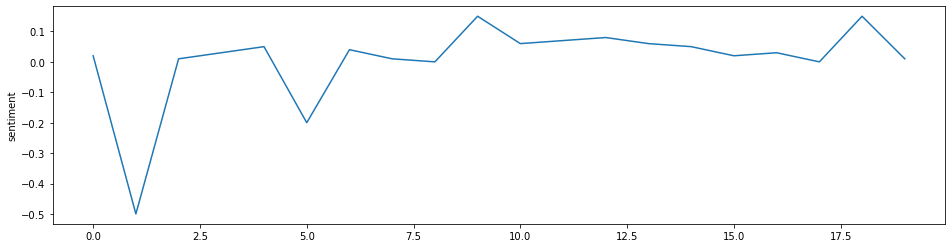

In [36]:
plt.figure(figsize=(16, 4))
sns.lineplot(y= 'sentiment', x=data.index, data= data)
plt.show()

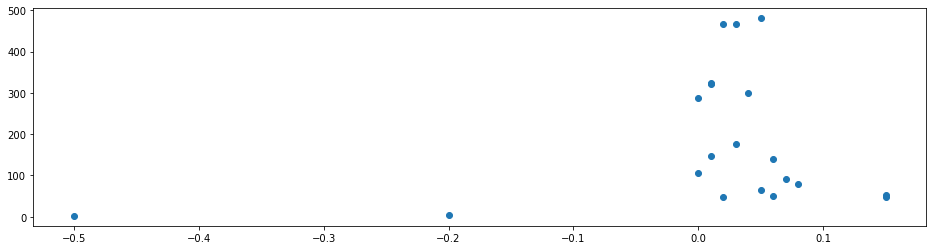

In [37]:
plt.figure(figsize=(16, 4))
plt.scatter(data['sentiment'], data['total_len'])
plt.show()

In [38]:
# remove both the leading and the trailing characters
reviews=[review.strip() for review in data.Reviews] 
reviews=[review.lower() for review in data.Reviews]
# remove empty strings, because they are considered in Python as False
reviews=[review for review in reviews if review] 
word_cloud_data = ' '.join(reviews)

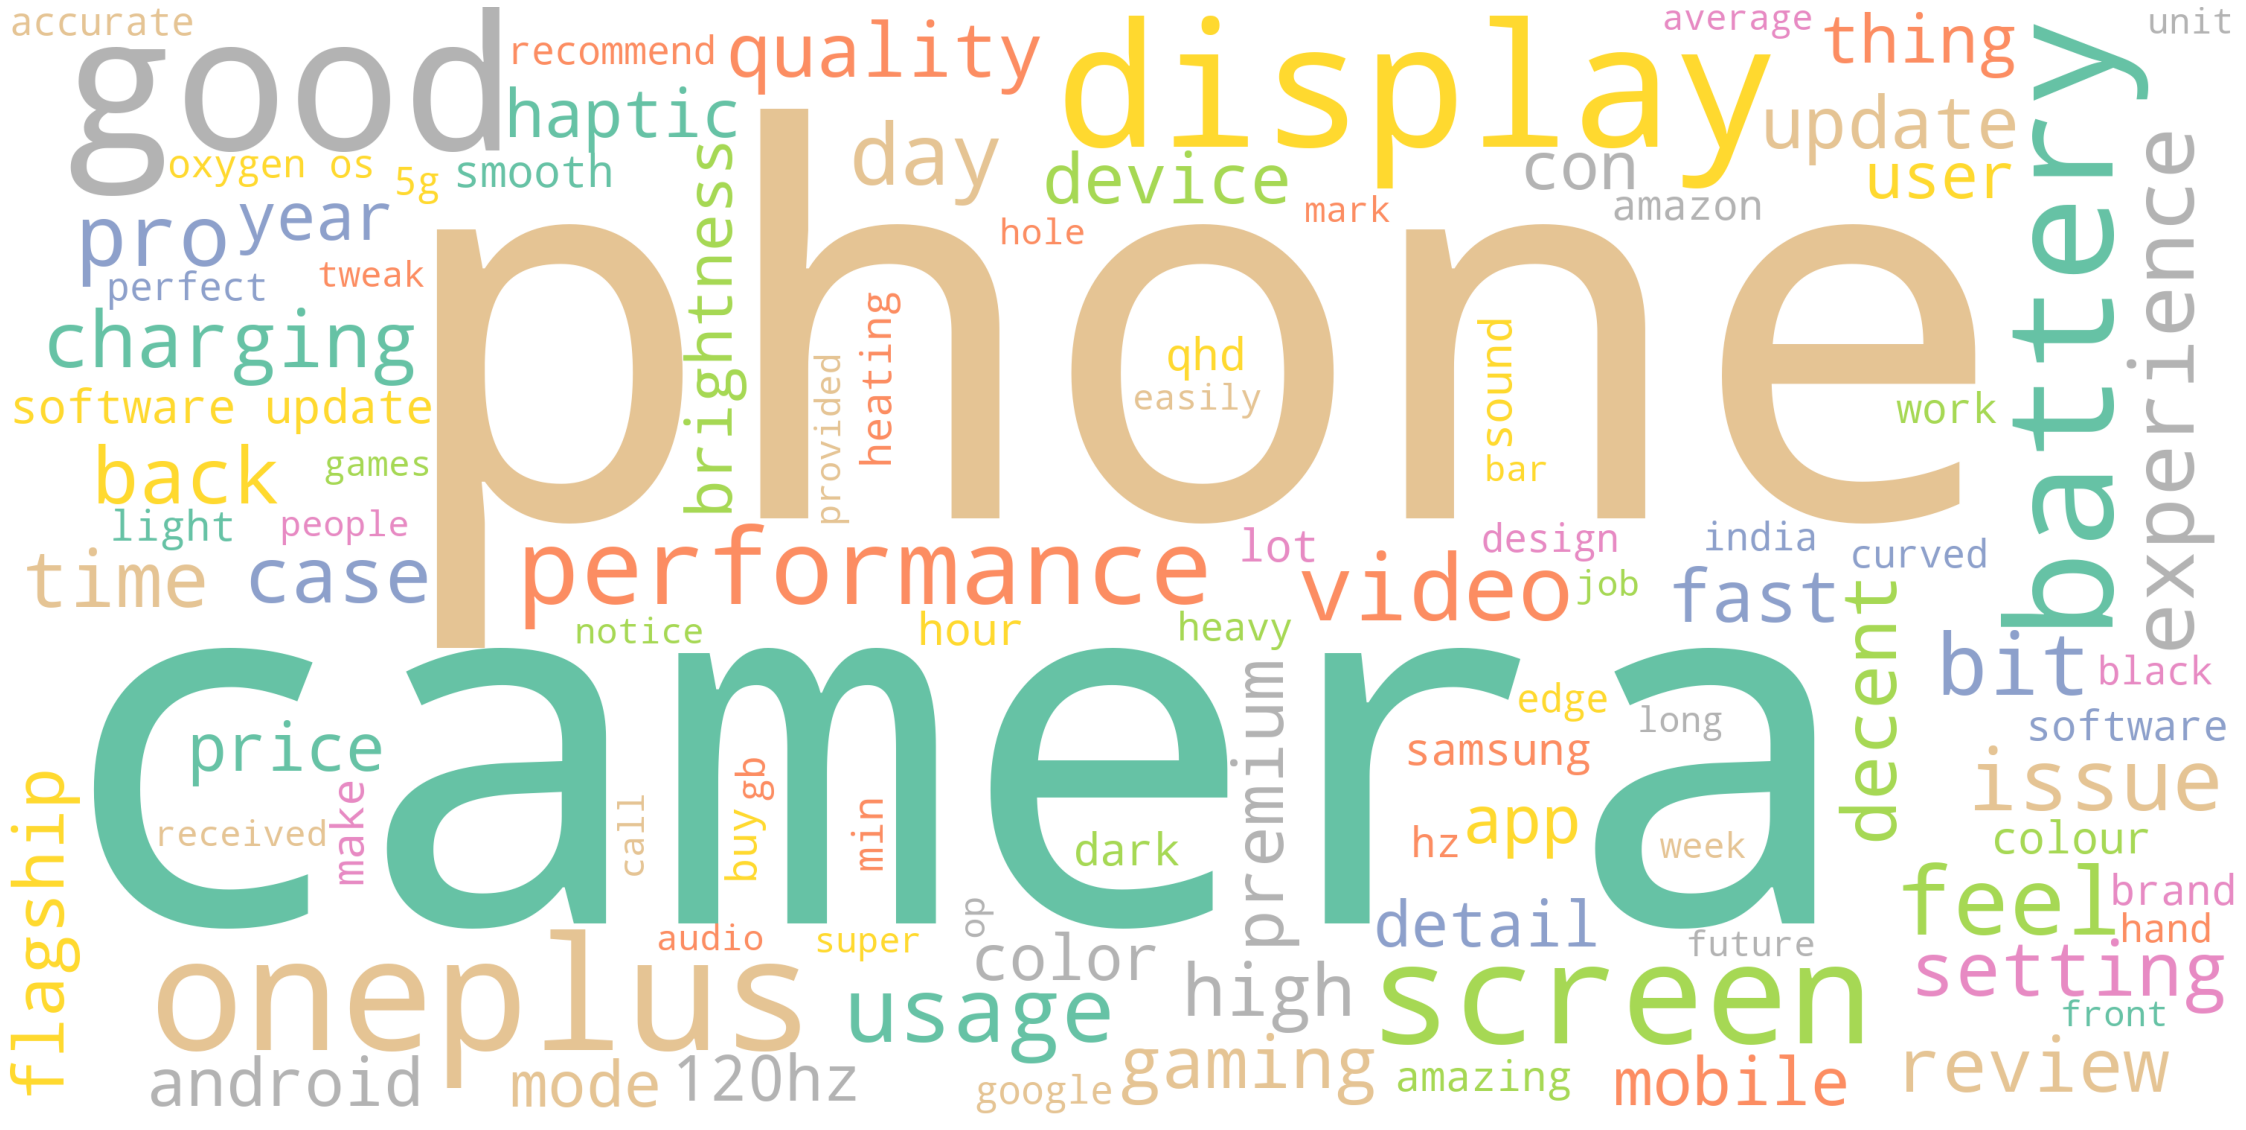

In [39]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud
# STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=1500,background_color='white',max_words=100,
                   colormap='Set2',stopwords=stop_words).generate(word_cloud_data)
plot_cloud(wordcloud)